In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df=pd.read_csv(r'F:\Practice\Water Quality Prediction/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

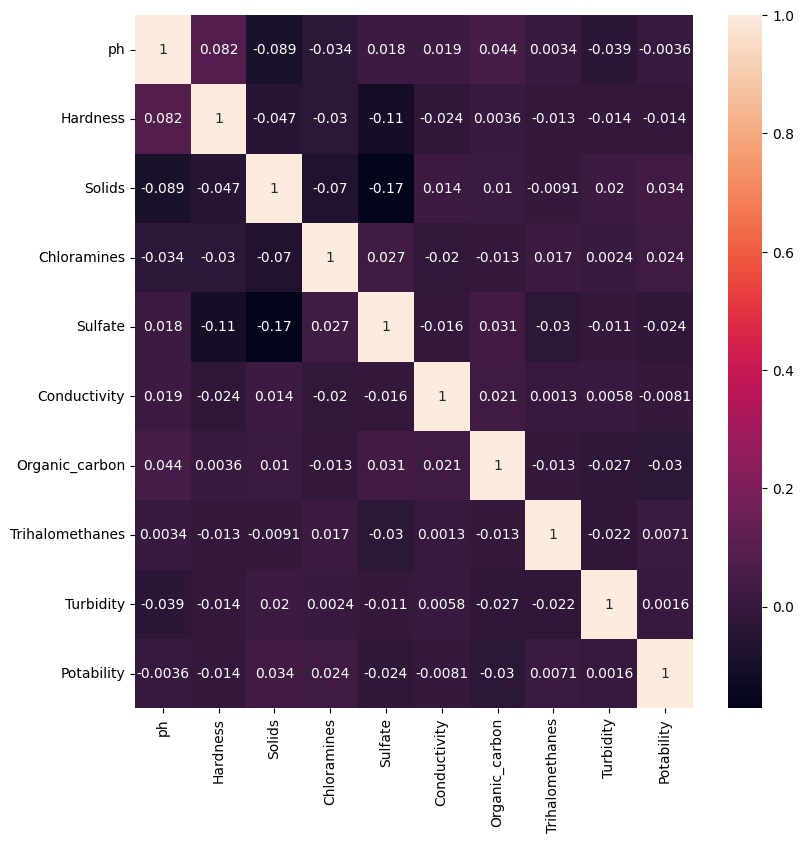

In [6]:
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [7]:
df_sul=df[['Sulfate','Organic_carbon','Chloramines']]

In [8]:
df_sul=df_sul.dropna()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scled=scaler.fit_transform(df_sul.drop('Sulfate',axis=1))

In [10]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(scled,df_sul['Sulfate'],random_state=42,test_size=0.3)

In [11]:
from sklearn.svm import SVR
svr=SVR()

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2],'gamma':['scale','auto'],'C':[1.2,1.3,1.4,1.7]}
gs=GridSearchCV(svr,param_grid=param_grid,n_jobs=-1,cv=3,verbose=3)

In [14]:
gs.fit(x_tr,y_tr)
sul_pr=gs.predict(x_te)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [15]:
sulfatee=gs.predict(scaler.fit_transform(df[['Organic_carbon','Chloramines']]))

In [16]:
df['sulfatee']=sulfatee

In [17]:
df.drop('Sulfate',axis=1,inplace=True)

In [18]:
tr_df=df[['Chloramines','Conductivity','Potability','Trihalomethanes']]
tr_df=tr_df.dropna()
tr_sc=scaler.fit_transform(tr_df.drop('Trihalomethanes',axis=1))
tr_tr,tr_te,ytr_tr,yte_te=train_test_split(tr_sc,tr_df['Trihalomethanes'],random_state=42,test_size=0.3)
gs.fit(tr_tr,ytr_tr)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.2, 1.3, 1.4, 1.7], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [19]:
trr=gs.predict(scaler.fit_transform(df[['Chloramines','Conductivity','Potability']]))

In [20]:
df['trr']=trr
df.drop('Trihalomethanes',axis=1,inplace=True)

In [21]:
ph_df=df[['ph','Hardness','sulfatee','Conductivity','Organic_carbon','trr']]
ph_df.dropna(inplace=True)
ph_sc=scaler.fit_transform(ph_df.drop('ph',axis=1))
x_tr,x_te,y_tr,y_te=train_test_split(ph_sc,ph_df['ph'],random_state=42,test_size=0.3)
gs.fit(x_tr,y_tr)
phh=gs.predict(df[['Hardness','sulfatee','Conductivity','Organic_carbon','trr']])
df['phh']=phh
df.drop('ph',axis=1,inplace=True)

C:\Users\Delhi Murali\AppData\Local\Temp\ipykernel_26092\232393435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_df.dropna(inplace=True)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\Delhi Murali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [22]:
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,sulfatee,trr,phh
0,204.890456,20791.31898,7.300212,564.308654,10.379783,2.963135,0,335.408046,65.776040,-16.521473
1,129.422921,18630.05786,6.635246,592.885359,15.180013,4.500656,0,334.885293,65.547686,-39.729812
2,224.236259,19909.54173,9.275884,418.606213,16.868637,3.055934,0,332.929247,66.708050,5.541052
3,214.373394,22018.41744,8.059332,363.266516,18.436525,4.628771,0,335.032645,66.739087,9.368774
4,181.101509,17978.98634,6.546600,398.410813,11.558279,4.075075,0,335.020897,66.344148,-3.645914


In [23]:
df.isnull().sum()

Hardness          0
Solids            0
Chloramines       0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
sulfatee          0
trr               0
phh               0
dtype: int64

In [24]:
from sklearn.svm import SVC
svc=SVC()
param_grid={'C':[1.2,1.5,2.2,3.5,3.2,4.1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,4,8,10],'gamma':['scale','auto']}
gridsearch=GridSearchCV(svc,param_grid=param_grid,n_jobs=-1,verbose=4,cv=3)

In [25]:
scaled_x=scaler.fit_transform(df.drop('Potability',axis=1))

In [26]:
x_tr,x_te,y_tr,y_te=train_test_split(scaled_x,df['Potability'],random_state=42,test_size=0.3)

In [27]:
x_tr.shape,y_tr.shape

((2293, 9), (2293,))

In [28]:
gridsearch.fit(x_tr,y_tr)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.2, 1.5, 2.2, 3.5, 3.2, 4.1],
                         'degree': [1, 2, 4, 8, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=4)

In [29]:
gridsearch.best_params_

{'C': 1.2, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [30]:
predicted_y=gridsearch.predict(x_te)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_te,predicted_y))

[[617   0]
 [  0 366]]


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,predicted_y)

1.0